# Project: Image Analysis

In [1]:
# import packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as mpl

## Outline

#### Choose your image (or set of images)

1) choose an underexposed (low light) image online (search on google "low light" or "underexposed")

2) check if you can access the page and process it! if not, do not use it

3) get the image with urlib

************
#### Compress the image

1) first of all, just make the image smaller (at least 4 times smaller)


************
#### Fix the image

1) check the image RGB components: print_RGB_histogram

2) write down (in words) what you want to do to fix the image

3) get the image in numpy

4) fix the image

5) display the image

************
#### Optional: more on filter

1) change the color components (more green, more red, or less blue, your choice)

************
#### Optional: more on filter

1) apply one of the filter to make the image blurry (see the presentation for L17)

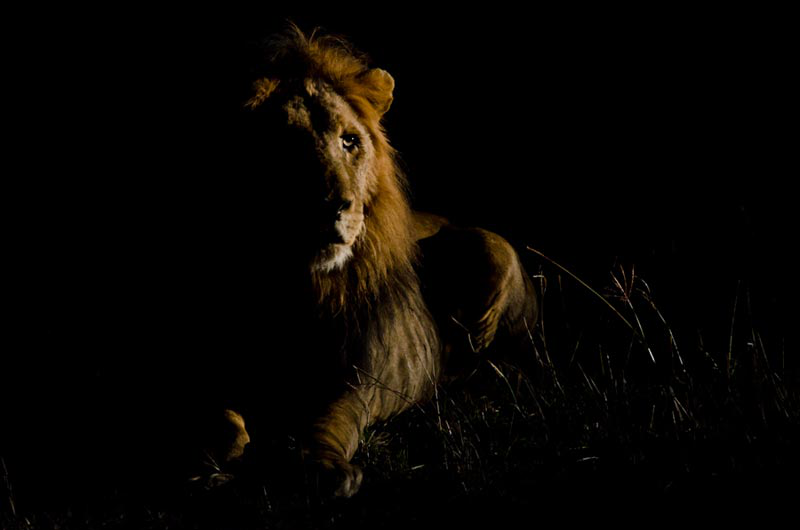

In [21]:
#import and display the image
from PIL import Image, ImageEnhance
image = Image.open("data/low light image.jpg")
display(image)

In [8]:
#print compressed image
def printLargeImage(smallImage,factor):
    maxsize = tuple([factor*x for x in smallImage.size])
    largeImage = smallImage.resize(maxsize)
    display(largeImage)
    return

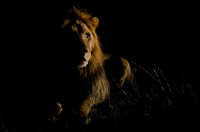

In [9]:
#read the image as a numpy array
im_array = np.array(image)

#compress the image 16 times smaller
compr = 4
im_compressed = np.zeros([int(im_array.shape[0]/compr),int(im_array.shape[1]/compr),3]).astype('uint8')

for x in range(im_compressed.shape[0]):
    for y in range(im_compressed.shape[1]):
        for z in range(3):
            im_compressed[x,y,z] = np.mean(im_array[4*x:4*x+4,4*y:4*y+4,z]).astype('uint8')
image2 = Image.fromarray(im_compressed)
printLargeImage(image2,1)

<IPython.core.display.Javascript object>


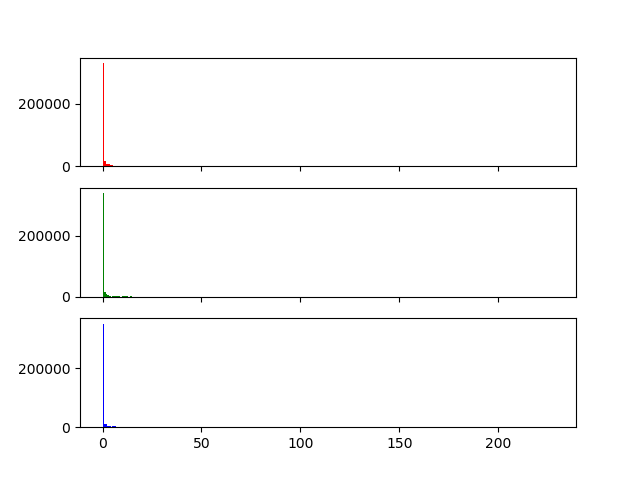

In [12]:
#print RGB components
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def print_RGB_histogram(image_array):
    num_bins = 255

    fig, ax = plt.subplots(3, sharex=True)

    # the histogram of the data
    n, bins, patches = ax[0].hist(image_array[:,:,0].flatten(), num_bins, color="red")
    n, bins, patches = ax[1].hist(image_array[:,:,1].flatten(), num_bins, color="green")
    n, bins, patches = ax[2].hist(image_array[:,:,2].flatten(), num_bins, color="blue")

    plt.show()
print_RGB_histogram(im_array)

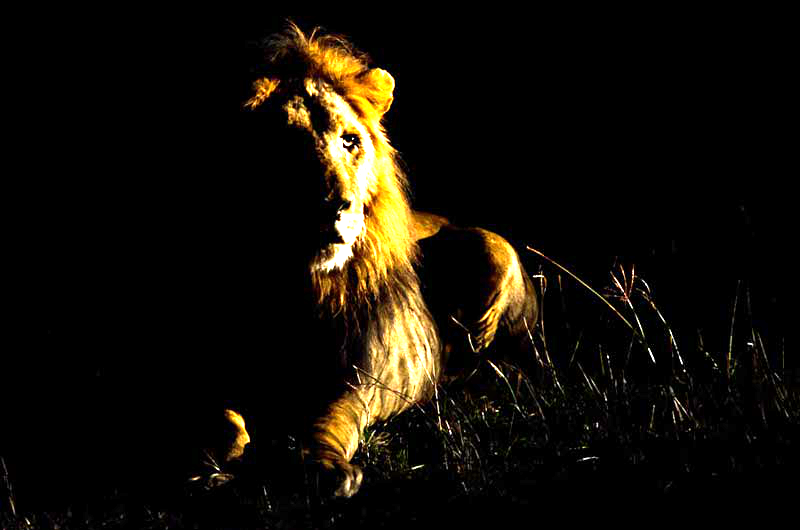

In [25]:
#Make the image brighter
bright_image = ImageEnhance.Brightness(image)
bright_image = bright_image.enhance(3)
display(bright_image)